#**Sprint 2**

Team ID : PNT2022TMID39415

Project Name : Real-Time Communication System Powered by AI for Specially Abled
____

**From Sprint 1**

In [ ]:
#import imagedatagenerator
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#training datagen
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
#testing datagen
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
import tensorflow as tf
import os

In [ ]:
#create model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import matplotlib.pyplot as plt #to view graph in colab itself
import IPython.display as display
from PIL import Image
import pathlib

In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/training_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 15799 images belonging to 9 classes.


In [ ]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test_set',target_size=(64,64),batch_size=200,
                                          class_mode='categorical',color_mode="grayscale")

Found 2250 images belonging to 9 classes.


In [ ]:
a=len(x_train)
b=len(x_test)

In [ ]:
print(a)

79


In [ ]:
print(b)

12


**ADD CNN**

In [ ]:
model=Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense( units=512, activation='relu'))

In [ ]:
model.add(Dense(units=9, activation='softmax'))

**Complie the Model**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Fit the Model**

In [ ]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
79/79 [==============================] - 104s 1s/step - loss: 0.3743 - accuracy: 0.8824 - val_loss: 0.1612 - val_accuracy: 0.9711
Epoch 2/10
79/79 [==============================] - 98s 1s/step - loss: 0.0480 - accuracy: 0.9878 - val_loss: 0.2134 - val_accuracy: 0.9636
Epoch 3/10
79/79 [==============================] - 97s 1s/step - loss: 0.0235 - accuracy: 0.9947 - val_loss: 0.1876 - val_accuracy: 0.9707
Epoch 4/10
79/79 [==============================] - 98s 1s/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.1638 - val_accuracy: 0.9778
Epoch 5/10
79/79 [==============================] - 99s 1s/step - loss: 0.0086 - accuracy: 0.9978 - val_loss: 0.1833 - val_accuracy: 0.9751
Epoch 6/10
79/79 [==============================] - 98s 1s/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 0.1965 - val_accuracy: 0.9787
Epoch 7/10
79/79 [==============================] - 100s 1s/step - loss: 0.0060 - accuracy: 0.9985 - val_loss: 0.1936 - val_accuracy: 0.9782
Epoch 8/10
79/79 [

In [61]:
%cd /content/drive/MyDrive/IBM projects

/content/drive/MyDrive/IBM projects


**Save the Model**

In [62]:
model.save('aslpng2.h5')                                      #save the model

***Test The Model***

In [63]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image

In [64]:
#load the model
model=load_model('aslpng2.h5')

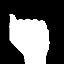

In [65]:
img=image.load_img('/content/drive/MyDrive/Dataset/test_set/A/10.png',target_size=(64,64))
img

**Prediction of Model**

In [66]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [67]:
img=image.load_img("/content/drive/MyDrive/Dataset/test_set/A/10.png")
detect(img)

1/1 [==============================] - 0s 115ms/step
THE PREDICTED LETTER IS  A


In [68]:
img = image.load_img('/content/drive/MyDrive/Dataset/test_set/E/111.png')
pred=detect(img)

1/1 [==============================] - 0s 28ms/step
THE PREDICTED LETTER IS  E


In [69]:
img=image.load_img('/content/drive/MyDrive/Dataset/test_set/D/110.png')
detect(img)

1/1 [==============================] - 0s 25ms/step
THE PREDICTED LETTER IS  D
